In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('/content/drive/Othercomputers/내 Mac/Desktop/datamining/data/winequality_red_train.csv')
test_df = pd.read_csv('/content/drive/Othercomputers/내 Mac/Desktop/datamining/data/winequality_red_test.csv')


In [3]:
# Separate features and target variable
X_train = train_df.drop('quality', axis=1)
y_train = train_df['quality']
X_test = test_df.drop('quality', axis=1)
y_test = test_df['quality']

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [8]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7360248447204969
Classification Report:
              precision    recall  f1-score   support

         Bad       0.69      0.75      0.72       291
        Good       0.78      0.73      0.75       353

    accuracy                           0.74       644
   macro avg       0.74      0.74      0.74       644
weighted avg       0.74      0.74      0.74       644



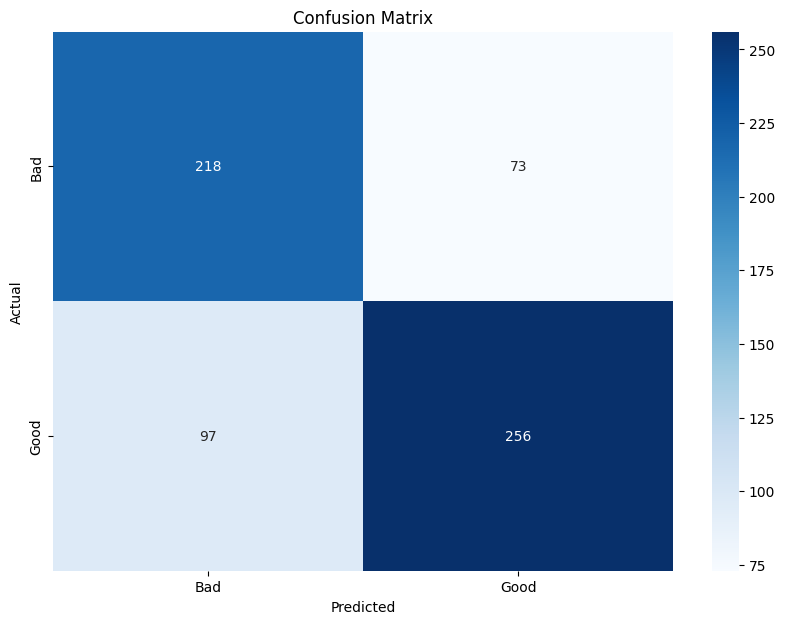

In [11]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()